<a href="https://colab.research.google.com/github/salehmfaisal/Abu-Saleh-Mosa-Faisal/blob/master/FLAML_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Machine Learning Modeling with FLAML

#### Install FLAML

In [1]:
! pip install flaml

     |████████████████████████████████| 221 kB 26.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 67.4 MB 25 kB/s 
     |████████████████████████████████| 2.0 MB 29.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [2]:
! pip install flaml[notebook]

     |████████████████████████████████| 2.6 MB 29.6 MB/s 
     |████████████████████████████████| 12.4 MB 165 kB/s 
     |████████████████████████████████| 757 kB 52.2 MB/s 
     |████████████████████████████████| 158 kB 62.7 MB/s 
  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190318 sha256=61253ec4e75ef94e0a7270346c710e9bb14bebe4b3a7539ae87beb94e05b099e
  Stored in directory: /root/.cache/pip/wheels/9c/9e/f3/6a5ebf16527d7fe22d9bc1652bc9beb5dc9fcfdeb75e805400
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=07d14b5f41fe37c2e3c743d1e903b3d7d01e71894bc3ebe284f77b640d859c34
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not 

#### Building a classification model

### Load Data

In [6]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [7]:
X= df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [8]:
y= df.logS
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

**Data Splitting**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [12]:
X.shape, X_train.shape, X_test.shape

((1144, 4), (915, 4), (229, 4))

In [13]:
y.shape, y_train.shape, y_test.shape

((1144,), (915,), (229,))

In [16]:
from flaml import AutoML
automl=AutoML()
automl.fit(X_train, y_train, task="regression")

[flaml.automl: 09-01 02:51:49] {1219} INFO - Evaluation method: cv
[flaml.automl: 09-01 02:51:49] {698} INFO - Using RepeatedKFold
[flaml.automl: 09-01 02:51:49] {1250} INFO - Minimizing error metric: 1-r2
[flaml.automl: 09-01 02:51:49] {1275} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree']
[flaml.automl: 09-01 02:51:49] {1458} INFO - iteration 0, current learner lgbm
[flaml.automl: 09-01 02:51:50] {1620} INFO -  at 0.6s,	best lgbm's error=0.5960,	best lgbm's error=0.5960
[flaml.automl: 09-01 02:51:50] {1458} INFO - iteration 1, current learner lgbm
[flaml.automl: 09-01 02:51:51] {1620} INFO -  at 1.9s,	best lgbm's error=0.5960,	best lgbm's error=0.5960
[flaml.automl: 09-01 02:51:51] {1458} INFO - iteration 2, current learner xgboost
[flaml.automl: 09-01 02:51:51] {1620} INFO -  at 2.0s,	best xgboost's error=1.8696,	best lgbm's error=0.5960
[flaml.automl: 09-01 02:51:51] {1458} INFO - iteration 3, current learner xgboost
[flaml.automl: 09-0

Print the best Model

In [17]:
print(automl.model)

# Prediction

In [22]:
y_test_predict=automl.predict(X_test)

In [23]:
y_test_predict

array([-0.92885447, -5.9472146 , -4.7084727 , -3.3444452 , -0.7344321 ,
       -4.938797  , -0.52295697, -4.4509773 , -3.6967978 , -3.3015995 ,
       -1.8388236 , -1.3453759 , -3.5350137 , -2.4264548 , -3.3628218 ,
       -2.3250241 , -3.0975313 , -4.3131404 , -0.9267986 , -2.2464368 ,
       -3.8534846 , -1.6174524 , -4.4079595 , -2.8543057 ,  0.8939849 ,
       -0.2351579 , -2.7571564 , -5.421992  , -3.4896336 , -4.0931807 ,
       -2.4020844 , -2.9445407 , -4.80922   , -1.5871873 , -1.6890714 ,
       -7.982438  , -0.36769903, -1.6544454 , -1.7574654 , -2.0612133 ,
       -1.5871873 , -7.0831146 , -1.6846349 , -0.9098729 , -2.3446617 ,
       -3.3015995 , -4.6285663 , -1.6839025 , -0.03483307, -1.4534366 ,
       -3.638186  , -2.0800169 , -2.1681654 , -2.6404154 , -6.5474753 ,
       -5.6015725 , -3.847148  , -2.997606  ,  0.25984204, -2.28183   ,
       -4.208015  , -4.6272635 , -0.2957965 , -0.8847476 , -2.6079512 ,
       -1.5601578 , -1.6294446 , -7.2935944 , -1.9496238 , -2.32

# Scatter Plot

In [26]:
import matplotlib.pyplot as plt
import numpy as np

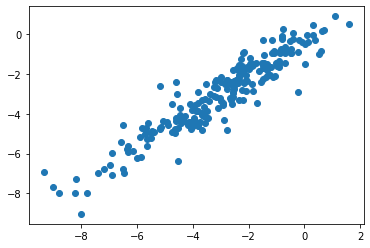

In [24]:
plt.scatter(y_test, y_test_predict)

Text(0.5, 0, 'Experimental LogS')

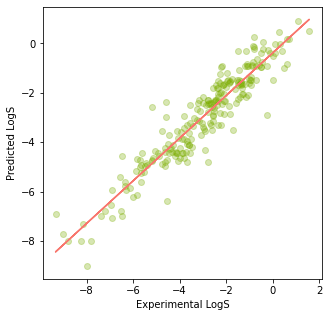

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_test_predict, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(y_test, y_test_predict, 1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# Model Performance

In [36]:
# Compute the MCC
from sklearn.metrics import r2_score

In [38]:
r2= r2_score(y_test, y_test_predict)

In [40]:
print(round(r2, 3))

0.882
